In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline
import seaborn as sns
import platform
from matplotlib import font_manager , rc

if platform.system() == 'Darwin':
  rc('font' , family = 'AppleGothic')
elif platform.system() == 'Windows':
  path = 'C:/Windows/Fonts/malgun.ttf'
  font_name = font_manager.FontProperties(fname = path).get_name()
  rc('font' , family = font_name)
else:
  print('모름')
plt.rcParams['axes.unicode_minus'] = False
import warnings
warnings.filterwarnings('ignore')

# 군집분석
 - 비계층적 군집분석
  - 계층적 군집분석보다 속도 빠름
  - 군집의 수를 알고 잇는 경우 이용
  - k는 미리 정하는 군집 수
  - 확인적 군집분석
  - 계층적 군집화의 결과에 의거하여 군집 수 결합
  - 변수보다 관측대상 군집화에 많이 이용
  - 군집의 중심은 사용자가 정함
  
 - K-평균 군집분석
  - k값을 초기값으로 , k개의 centroid 선정
  - 각 데이터 포인트를 가장 가까운 centroid에 할당
  - centroid에 할당된 모든 데이터 포인트의 중심 위치 계산
  - 제조정된 centroid와 가장 가까운 데이터 포인트 할당
  - centroid 재조정이 발생되지 않을 때까지 반복

# 데이터셋 로딩

In [5]:
fruits = np.load('fruits_300.npy')


In [6]:
fruits.shape

(300, 100, 100)

In [8]:
fruits[0,0,:]

array([  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   2,   1,   2,   2,   2,   2,   2,   2,   1,   1,
         1,   1,   1,   1,   1,   1,   2,   3,   2,   1,   2,   1,   1,
         1,   1,   2,   1,   3,   2,   1,   3,   1,   4,   1,   2,   5,
         5,   5,  19, 148, 192, 117,  28,   1,   1,   2,   1,   4,   1,
         1,   3,   1,   1,   1,   1,   1,   2,   2,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1], dtype=uint8)

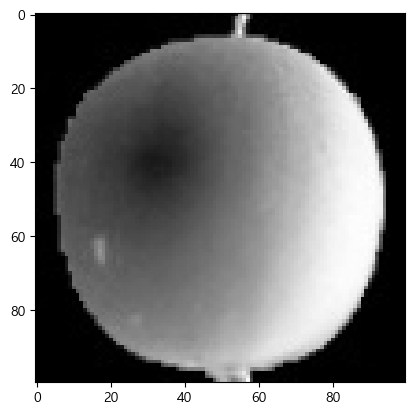

In [21]:
plt.imshow(fruits[0] , cmap = 'gray')
plt.show()

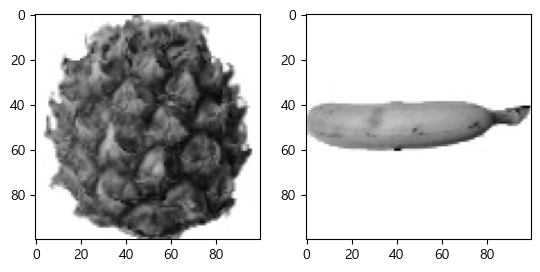

In [20]:
fig , axs = plt.subplots(1,2)

axs[0].imshow(fruits[100] , cmap = 'gray_r')
axs[1].imshow(fruits[200] , cmap = 'gray_r')
plt.show()

In [22]:
apple = fruits[:100].reshape(-1,100*100)
pineapple = fruits[100:200].reshape(-1,100*100)
banana = fruits[200:].reshape(-1,100*100)

In [24]:
apple.shape

(100, 10000)

In [25]:
apple.mean(axis = 1)

array([ 88.3346,  97.9249,  87.3709,  98.3703,  92.8705,  82.6439,
        94.4244,  95.5999,  90.681 ,  81.6226,  87.0578,  95.0745,
        93.8416,  87.017 ,  97.5078,  87.2019,  88.9827, 100.9158,
        92.7823, 100.9184, 104.9854,  88.674 ,  99.5643,  97.2495,
        94.1179,  92.1935,  95.1671,  93.3322, 102.8967,  94.6695,
        90.5285,  89.0744,  97.7641,  97.2938, 100.7564,  90.5236,
       100.2542,  85.8452,  96.4615,  97.1492,  90.711 , 102.3193,
        87.1629,  89.8751,  86.7327,  86.3991,  95.2865,  89.1709,
        96.8163,  91.6604,  96.1065,  99.6829,  94.9718,  87.4812,
        89.2596,  89.5268,  93.799 ,  97.3983,  87.151 ,  97.825 ,
       103.22  ,  94.4239,  83.6657,  83.5159, 102.8453,  87.0379,
        91.2742, 100.4848,  93.8388,  90.8568,  97.4616,  97.5022,
        82.446 ,  87.1789,  96.9206,  90.3135,  90.565 ,  97.6538,
        98.0919,  93.6252,  87.3867,  84.7073,  89.1135,  86.7646,
        88.7301,  86.643 ,  96.7323,  97.2604,  81.9424,  87.1

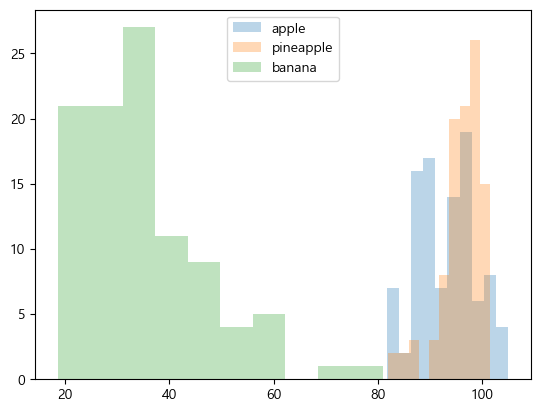

In [27]:
plt.hist(np.mean(apple , axis = 1) , alpha = 0.3 , label = 'apple')
plt.hist(np.mean(pineapple , axis = 1) , alpha = 0.3 , label = 'pineapple')
plt.hist(np.mean(banana , axis = 1) , alpha = 0.3 , label = 'banana')
plt.legend()
plt.show()

# K-Means를 이용한 iris Clustering

In [30]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [31]:
df = pd.DataFrame(iris.data , columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
df

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [43]:
df['target'] = iris.target

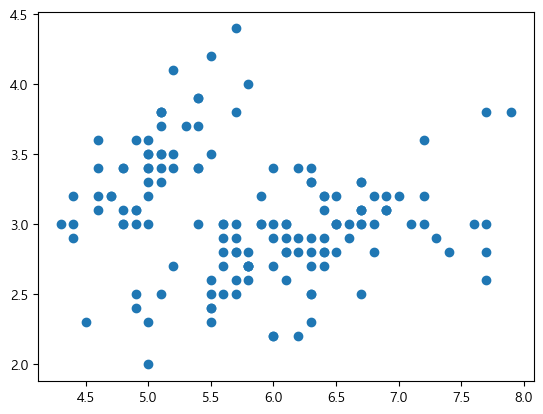

In [33]:
plt.scatter(df.sepal_length , df.sepal_width)

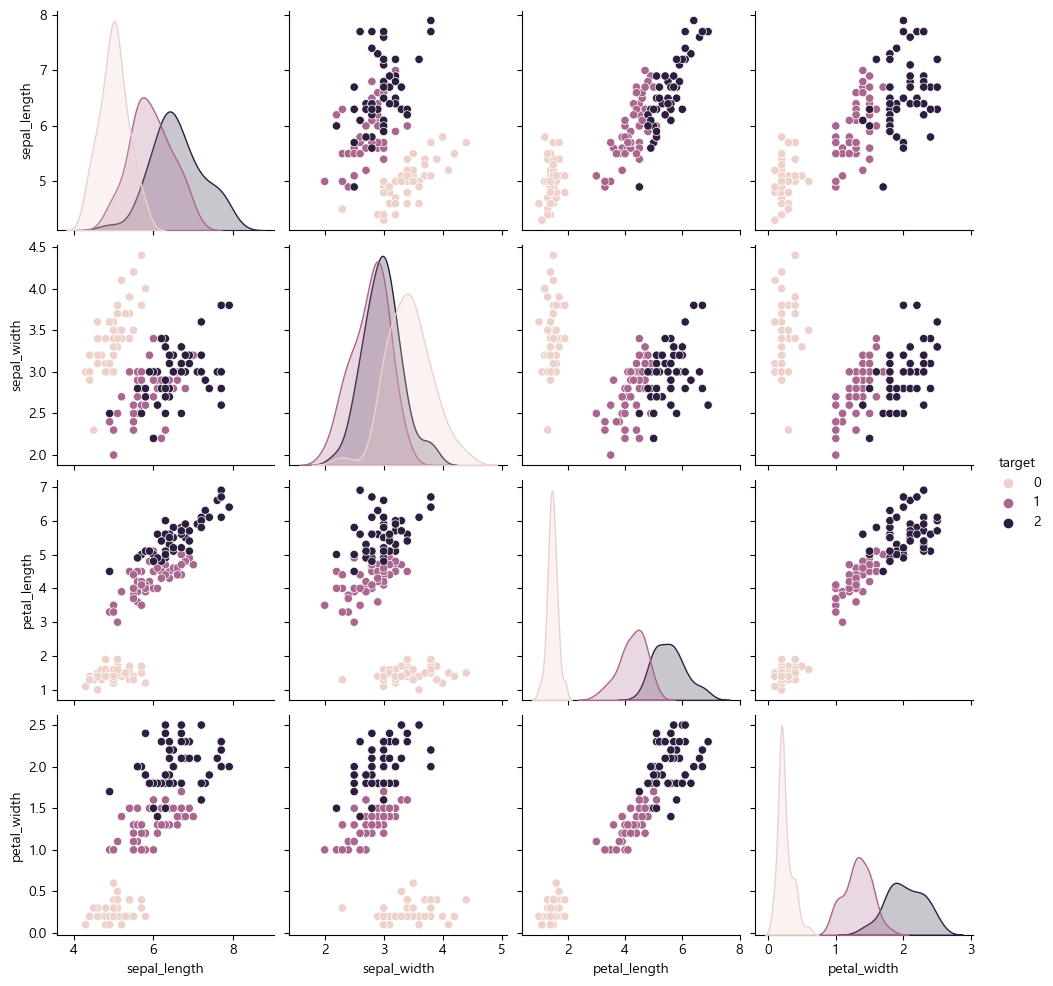

In [44]:
sns.pairplot(df , hue = 'target')

In [45]:
from sklearn.cluster import KMeans

In [46]:
model = KMeans(n_clusters = 3 , init = 'k-means++' , max_iter = 300 , random_state = 0)
model.fit(iris.data)

KMeans(n_clusters=3, random_state=0)

In [47]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [50]:
df['cluster'] = model.labels_

In [51]:
df

,sepal_length,sepal_width,petal_length,petal_width,target,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,0
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


# 차원축소(Dimension Reduction)

In [66]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [67]:
feature = ['sepal_length','sepal_width','petal_length','petal_width']

In [68]:
iris_df = pd.DataFrame(iris.data , columns = feature)

In [70]:
iris_df['target'] = iris.target

In [71]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


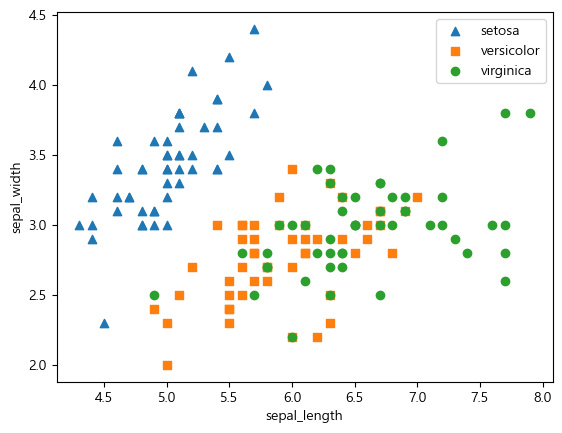

In [77]:
markers = ['^','s','o']

for i , marker in enumerate(markers):
    xpos = iris_df[iris_df.target == i]['sepal_length']
    ypos = iris_df[iris_df.target == i]['sepal_width']
    plt.scatter(xpos , ypos , marker = marker , label = iris.target_names[i])
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend()
plt.show()

In [81]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

iris_df_input = iris_df.iloc[:,:-1]
iris_df_target = iris_df.iloc[:,-1]
iris_scaled = ss.fit_transform(iris_df_input)

In [83]:
iris_scaled_df = pd.DataFrame(iris_scaled)
iris_scaled_df['target'] = iris_df.target
iris_scaled_df.describe()

,0,1,2,3,target
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,150.000000
mean,-1.468455e-15,-1.823726e-15,-1.610564e-15,-9.473903e-16,1.000000
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00,0.819232
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00,0.000000
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00,0.000000
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01,1.000000
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01,2.000000
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00,2.000000


In [85]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(iris_scaled)

PCA(n_components=2)

In [86]:
iris_pca = pca.transform(iris_scaled)

In [87]:
iris_pca

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

In [88]:
iris_scaled_df['pca_x'] = iris_pca[:,0]
iris_scaled_df['pca_y'] = iris_pca[:,1]

In [89]:
iris_scaled_df

,0,1,2,3,target,pca_x,pca_y
0,-0.900681,1.019004,-1.340227,-1.315444,0,-2.264703,0.480027
1,-1.143017,-0.131979,-1.340227,-1.315444,0,-2.080961,-0.674134
2,-1.385353,0.328414,-1.397064,-1.315444,0,-2.364229,-0.341908
3,-1.506521,0.098217,-1.283389,-1.315444,0,-2.299384,-0.597395
4,-1.021849,1.249201,-1.340227,-1.315444,0,-2.389842,0.646835
...,...,...,...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832,2,1.870503,0.386966
146,0.553333,-1.282963,0.705921,0.922303,2,1.564580,-0.896687
147,0.795669,-0.131979,0.819596,1.053935,2,1.521170,0.269069
148,0.432165,0.788808,0.933271,1.448832,2,1.372788,1.011254


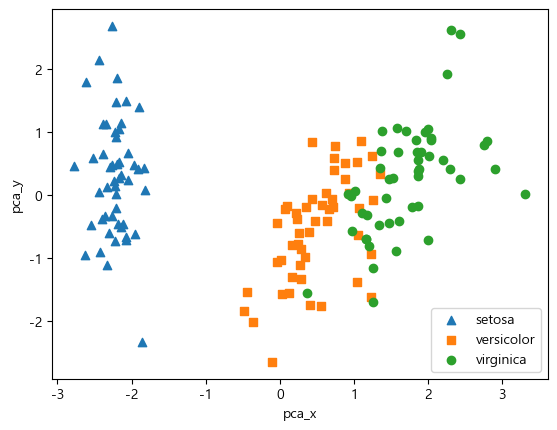

In [90]:
markers = ['^','s','o']

for i , marker in enumerate(markers):
    xpos = iris_scaled_df[iris_df.target == i]['pca_x']
    ypos = iris_scaled_df[iris_df.target == i]['pca_y']
    plt.scatter(xpos , ypos , marker = marker , label = iris.target_names[i])
plt.xlabel('pca_x')
plt.ylabel('pca_y')
plt.legend()
plt.show()

In [92]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(random_state = 2023)
scores = cross_val_score(rf , iris_df.iloc[:,:-1] , iris_df.target , scoring = 'accuracy' , cv = 3)
scores

array([0.98, 0.94, 0.98])

In [102]:
rf_scaled = RandomForestClassifier(random_state = 2023)
scores_scaled = cross_val_score(rf_scaled , iris_scaled_df.iloc[:,-2:] , iris_scaled_df.target , scoring = 'accuracy' , cv = 3)
scores_scaled

array([0.88, 0.88, 0.9 ])

In [104]:
scores.mean() , scores_scaled.mean()

(0.9666666666666667, 0.8866666666666667)

# 계층적 군집분석
 - KMeans와는 달리 군집 수를 사전에 정하지 않음.
 - Dendrogram을 이용하여 군집 수를 결정
 - KMeans로 군집을 올바르게 설정했는지 확인
 - 연결 방법
  - single linkage : 두 클러스터 내의 가장 가까운 점 사이의 거리
  - complete linkage : 두 클러스터 내의 가장 먼 점 사이의 거리
  - average linkage : 두 클러스터 내의 모든 점 사이의 평균거리

In [108]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [111]:
from scipy.cluster.hierarchy import linkage , dendrogram

cluster = linkage(y = iris_df , method = 'complete' , metric = 'euclidean')
plt.figure(figsize = (25,10))
# leaf_rotation : 글자의 각도
# leaf_font_size : 글자의 크기
dendrogram(cluster)

plt.show()

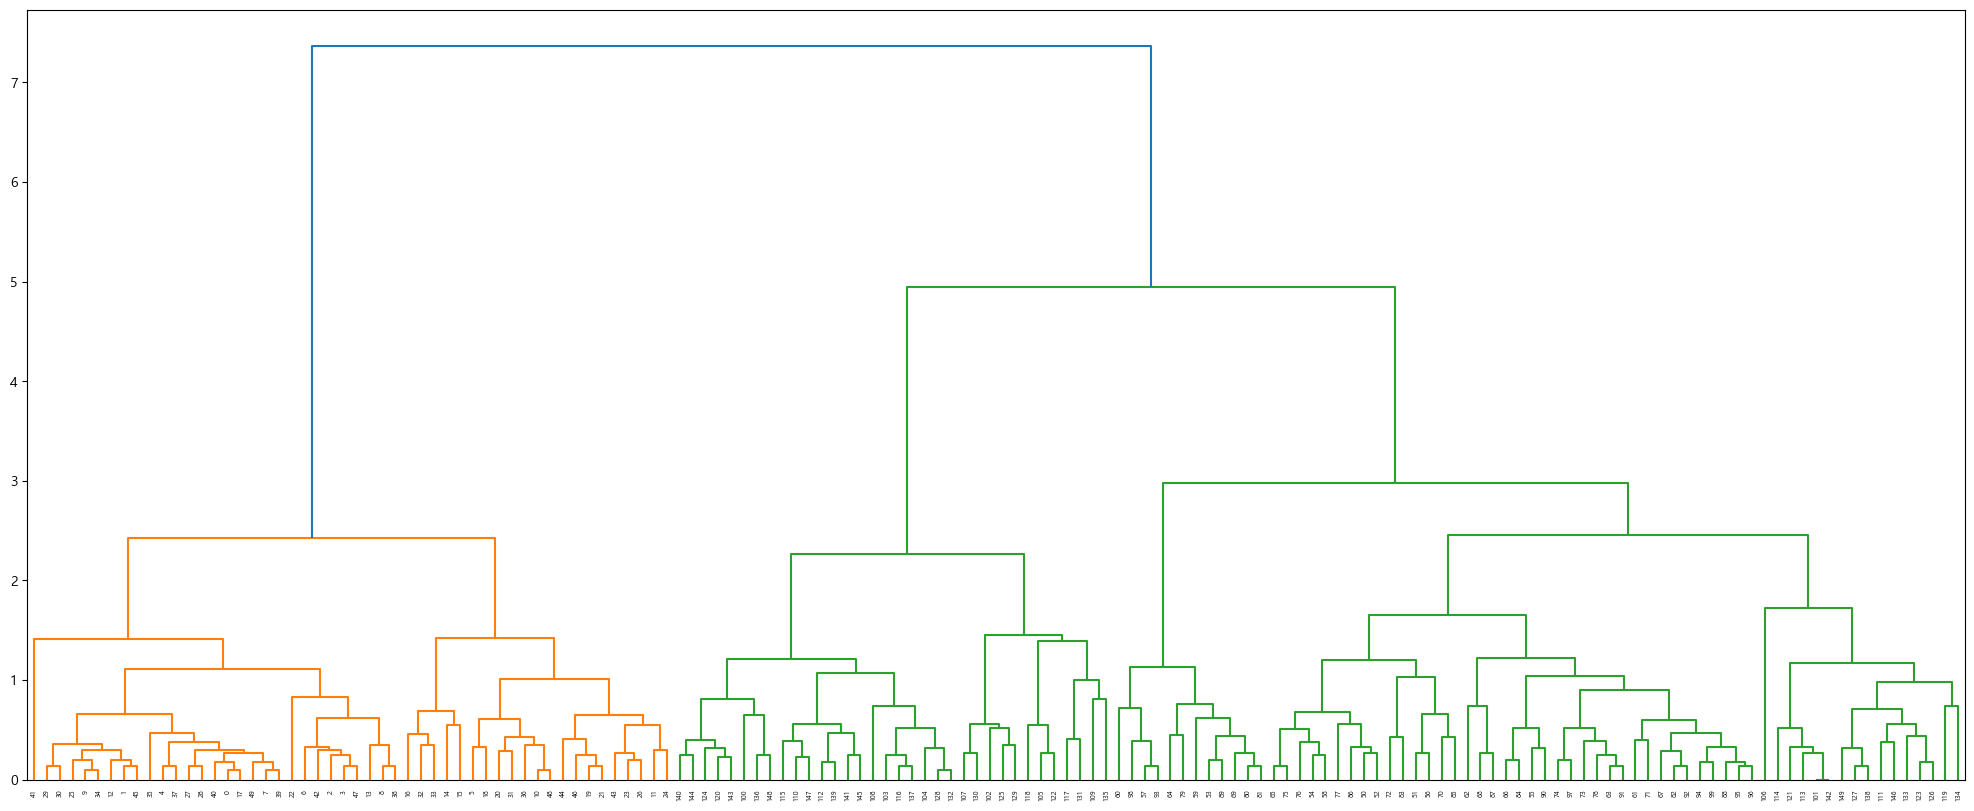

In [120]:
plt.figure(figsize = (25,10))
# leaf_rotation : 글자의 각도
# leaf_font_size : 글자의 크기
dendrogram(cluster)

plt.show()

In [122]:
# 클러스터의 결과를 확인할 때 사용하는 함수
# 덴드로그램을 통해 군집할 클러스터의 수를 지정하고 , 예측한다는 뜻
from scipy.cluster.hierarchy import fcluster

cut = fcluster(cluster , t = 3 , criterion = 'distance')
cut

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 3, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3], dtype=int32)

In [123]:
labels = iris.target
df = pd.DataFrame({'pred' : cut , 'labels' : labels})
df

,pred,labels
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
145,2,2
146,3,2
147,2,2
148,2,2


In [125]:
result = pd.crosstab(df['pred'] , df['labels'])
result

labels,0,1,2
pred,,,
1,50,0,0
2,0,0,34
3,0,50,16


In [127]:
iris_df['pred'] = cut

In [130]:
iris_df['pred'].value_counts()

3    66
1    50
2    34
Name: pred, dtype: int64

In [132]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,target,pred
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,3
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


## K-means

In [134]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3 , init = 'k-means++' , max_iter = 300 , random_state = 0)
kmeans.fit(iris_df.iloc[:,:-2])

KMeans(n_clusters=3, random_state=0)

In [135]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])